In [1]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import dataloader

In [4]:
! unzip archive.zip

Archive:  archive.zip
  inflating: chest_xray/__MACOSX/._chest_xray  
  inflating: chest_xray/__MACOSX/chest_xray/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/._test  
  inflating: chest_xray/__MACOSX/chest_xray/._train  
  inflating: chest_xray/__MACOSX/chest_xray/test/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/test/._NORMAL  
  inflating: chest_xray/__MACOSX/chest_xray/test/._PNEUMONIA  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0001-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0003-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0005-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0006-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0007-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0009-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0010-0001.jpeg  
  inflating: chest_xray/__MACOSX/

  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person21_virus_53.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person22_virus_54.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person22_virus_55.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person23_virus_56.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person24_virus_58.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person25_virus_59.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person26_virus_60.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person28_virus_62.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person28_virus_63.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person29_virus_64.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUMONIA/._person30_virus_69.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/PNEUM

  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1236-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1237-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1240-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1241-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1242-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1243-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1244-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1245-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1247-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1250-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1252-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1201_bacteria_3151.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1202_bacteria_3152.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1202_bacteria_3153.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1202_virus_2045.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1203_bacteria_3154.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1203_bacteria_3155.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1204_bacteria_3156.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1205_bacteria_3157.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1206_bacteria_3158.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1206_virus_2051.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._pers

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1539_virus_2679.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person153_virus_304.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1540_bacteria_4023.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1540_virus_2680.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1541_virus_2681.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1542_bacteria_4029.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1542_virus_2683.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1543_virus_2684.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1544_bacteria_4033.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1544_bacteria_4035.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1544_bacteri

  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person456_bacteria_1948.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person456_virus_943.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person457_bacteria_1949.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person457_virus_944.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person458_bacteria_1950.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person458_bacteria_1951.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person458_bacteria_1952.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person458_bacteria_1953.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person458_bacteria_1954.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person458_bacteria_1955.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person458_virus_

  inflating: chest_xray/chest_xray/test/NORMAL/IM-0009-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0010-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0011-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0011-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0011-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0013-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0015-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0016-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0017-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0019-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0021-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0022-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0023-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-0025-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/IM-00

  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0271-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0272-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0273-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0274-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0275-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0276-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0277-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0278-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0279-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0280-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0281-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0282-0001.jpeg  
  inflating: chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0283-0001.jpeg  
  inflating: chest_xray/c

  inflating: chest_xray/chest_xray/test/PNEUMONIA/person143_bacteria_688.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person143_bacteria_689.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person144_bacteria_690.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person145_bacteria_696.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person146_bacteria_700.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person146_bacteria_703.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person146_bacteria_704.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person147_bacteria_705.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person147_bacteria_707.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person147_bacteria_711.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person149_bacteria_713.jpeg  
  inflating: chest_xray/chest_xray/test/

  inflating: chest_xray/chest_xray/test/PNEUMONIA/person48_virus_100.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person49_virus_101.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person50_virus_102.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person51_virus_105.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person52_virus_106.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person53_virus_107.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person53_virus_108.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person54_virus_109.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person55_virus_110.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person56_virus_112.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person57_virus_113.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person59_virus_116.jpeg  
  inflating: chest_xray/chest_xray/test/PNEUMONIA/person60_virus_117.jpeg  
  inflating:

  inflating: chest_xray/chest_xray/train/NORMAL/IM-0149-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0151-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0152-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0154-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0156-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0158-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0160-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0162-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0164-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0166-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0168-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0170-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0172-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0176-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/

  inflating: chest_xray/chest_xray/train/NORMAL/IM-0316-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0317-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0318-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0319-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0320-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0323-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0324-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0325-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0326-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0327-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0329-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0330-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0331-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0332-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/

  inflating: chest_xray/chest_xray/train/NORMAL/IM-0467-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0467-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0467-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0469-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0471-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0472-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0473-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0474-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0475-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0476-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0477-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0478-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0479-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0480-0001.jpeg  
  inflating: chest_xray/chest_xray/tra

  inflating: chest_xray/chest_xray/train/NORMAL/IM-0555-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0556-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0557-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0559-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0560-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0561-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0562-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0563-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0564-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0565-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0566-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0568-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0569-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0570-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/

  inflating: chest_xray/chest_xray/train/NORMAL/IM-0667-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0668-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0669-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0670-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0671-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0672-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0673-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0674-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0675-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0676-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0677-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0678-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0679-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0680-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/

  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0435-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0437-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0439-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0440-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0441-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0443-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0445-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0447-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0448-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0449-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0450-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0451-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0452-0001.jpeg  
  inflating:

  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0580-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0582-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0583-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0585-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0587-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0587-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0587-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0588-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0589-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0592-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0594-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0595-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0596-0001.jpeg  
  

  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0808-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0809-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0810-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0811-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0812-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0814-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0815-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0816-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0818-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0818-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0819-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0820-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0821-0001.jpeg  
  infla

  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0939-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0941-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0942-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0944-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0945-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0946-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0947-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0948-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0949-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0950-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0951-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0952-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0954-0001.jpeg  
  inflating:

  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1102-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1102-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1102-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1103-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1104-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1105-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1106-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1108-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1109-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1110-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1111-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1112-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1113-0001.jpeg

  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1228-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1231-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1232-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1234-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1236-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1237-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1240-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1241-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1242-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1243-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1244-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1245-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1247-0001.jpeg  
  inflating:

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1015_virus_1702.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1016_bacteria_2947.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1016_virus_1704.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1017_bacteria_2948.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1018_bacteria_2949.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1018_virus_1706.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1019_bacteria_2950.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1019_virus_1707.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1019_virus_1708.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person101_virus_187.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person101_virus_188.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1020_bacteria_2951.jpeg  
  inflating: chest_xray/chest

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1110_bacteria_3051.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1110_virus_1835.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1111_bacteria_3052.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1111_virus_1836.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1112_bacteria_3053.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1112_virus_1837.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1113_virus_1838.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1114_bacteria_3055.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1115_bacteria_3056.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1115_virus_1840.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1116_virus_1841.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1118_bacteria_3059.jpeg  
  inflating: chest_xra

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1194_bacteria_3143.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1195_bacteria_3144.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1196_bacteria_3146.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1197_bacteria_3147.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1197_virus_2039.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1198_bacteria_3148.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1199_bacteria_3149.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person119_virus_225.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person11_bacteria_45.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1200_virus_2042.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1201_bacteria_3151.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1202_bacteria_3152.jpeg  
  inflating: chest_

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1289_bacteria_3252.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person128_virus_261.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1290_bacteria_3253.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1290_virus_2215.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1290_virus_2216.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1291_virus_2217.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1292_bacteria_3255.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1292_virus_2218.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1293_virus_2219.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1294_bacteria_3257.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1294_virus_2221.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1294_virus_2222.jpeg  
  inflating: chest_xray/chest_

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1349_bacteria_3439.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person134_virus_268.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1350_virus_2329.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1351_bacteria_3441.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1351_virus_2330.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1352_bacteria_3442.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1352_bacteria_3443.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1352_bacteria_3444.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1352_bacteria_3445.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1353_bacteria_3446.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1353_virus_2333.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1354_bacteria_3448.jpeg  
  inflating: chest

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1413_bacteria_3617.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1413_bacteria_3620.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1413_virus_2422.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1413_virus_2423.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1414_bacteria_3627.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1414_bacteria_3628.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1414_virus_2424.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1415_bacteria_3629.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1415_virus_2425.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1416_virus_2427.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1417_bacteria_3635.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1418_bacteria_3636.jpeg  
  inflating: chest_

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1481_bacteria_3864.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1481_bacteria_3865.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1481_bacteria_3866.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1481_bacteria_3867.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1481_bacteria_3868.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1481_virus_2567.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1482_bacteria_3870.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1482_bacteria_3874.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1482_virus_2569.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1482_virus_2570.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1482_virus_2571.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1482_virus_2572.jpeg  
  inflating: chest_

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1539_bacteria_4022.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1539_virus_2678.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1539_virus_2679.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person153_virus_304.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1540_bacteria_4023.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1540_virus_2680.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1541_virus_2681.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1542_bacteria_4029.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1542_virus_2683.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1543_virus_2684.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1544_bacteria_4033.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1544_bacteria_4035.jpeg  
  inflating: chest_xray/che

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1601_bacteria_4209.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1601_bacteria_4212.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1602_bacteria_4218.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1602_virus_2780.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1603_virus_2781.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1604_virus_2782.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1605_bacteria_4226.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1607_bacteria_4232.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1607_virus_2785.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1608_bacteria_4235.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1609_bacteria_4236.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1609_bacteria_4237.jpeg  
  inflating: che

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1737_bacteria_4573.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1739_bacteria_4576.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1740_bacteria_4579.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1744_bacteria_4583.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1745_bacteria_4584.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1746_bacteria_4585.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1748_bacteria_4588.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1749_bacteria_4590.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1751_bacteria_4592.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1753_bacteria_4594.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1756_bacteria_4598.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person1757_bacteria_4599.jpeg  
  in

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person24_bacteria_110.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person24_bacteria_111.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person24_bacteria_112.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person253_bacteria_1152.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person253_bacteria_1153.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person253_bacteria_1154.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person253_bacteria_1155.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person253_bacteria_1156.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person253_bacteria_1157.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person255_bacteria_1160.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person255_bacteria_1161.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person255_bacteria_1162.jpeg  
  inflating: chest_xra

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person275_bacteria_1291.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person275_bacteria_1293.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person275_bacteria_1294.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person275_virus_565.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person276_bacteria_1295.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person276_bacteria_1296.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person276_bacteria_1297.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person276_bacteria_1298.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person276_bacteria_1299.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person276_virus_569.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person277_bacteria_1300.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person277_bacteria_1301.jpeg  
  inflating: chest_xray/

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person315_bacteria_1467.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person315_bacteria_1468.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person316_bacteria_1469.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person316_bacteria_1470.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person316_virus_641.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person317_bacteria_1471.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person317_bacteria_1473.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person317_virus_643.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person318_bacteria_1474.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person318_virus_644.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person319_bacteria_1475.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person319_bacteria_1476.jpeg  
  inflating: chest_xray/ches

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person362_bacteria_1652.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person362_virus_741.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person363_bacteria_1653.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person363_bacteria_1654.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person363_bacteria_1655.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person363_virus_742.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person364_bacteria_1656.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person364_bacteria_1657.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person364_bacteria_1658.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person364_bacteria_1659.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person364_bacteria_1660.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person364_virus_743.jpeg  
  inflating: chest_xray/ches

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person387_virus_772.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person388_virus_775.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person388_virus_777.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person389_bacteria_1778.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person389_bacteria_1780.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person389_virus_778.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person38_bacteria_190.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person38_bacteria_191.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person38_bacteria_192.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person38_bacteria_193.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person38_bacteria_194.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person38_bacteria_195.jpeg  
  inflating: chest_xray/chest_xray/train/PNE

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person441_bacteria_1905.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person441_bacteria_1907.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person441_bacteria_1910.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person441_bacteria_1911.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person441_bacteria_1912.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person441_bacteria_1914.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person441_bacteria_1915.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person441_bacteria_1916.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person441_bacteria_1917.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person441_bacteria_1918.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person441_virus_894.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person441_virus_895.jpeg  
  inflating: chest_xray/

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person486_bacteria_2054.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person486_virus_990.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person487_bacteria_2055.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person487_bacteria_2056.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person487_bacteria_2057.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person487_bacteria_2058.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person487_bacteria_2059.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person487_bacteria_2060.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person487_virus_991.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person488_bacteria_2061.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person488_bacteria_2062.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person488_virus_992.jpeg  
  inflating: chest_xray/ches

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person535_bacteria_2255.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person535_bacteria_2256.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person535_virus_1062.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person536_bacteria_2257.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person536_bacteria_2258.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person536_bacteria_2259.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person536_bacteria_2260.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person536_virus_1064.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person536_virus_1065.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person537_bacteria_2261.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person537_bacteria_2262.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person537_bacteria_2263.jpeg  
  inflating: chest_xray/c

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person587_bacteria_2421.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person588_bacteria_2422.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person588_bacteria_2423.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person588_virus_1134.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person588_virus_1135.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person589_bacteria_2424.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person589_bacteria_2425.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person58_bacteria_272.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person58_bacteria_273.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person58_bacteria_274.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person58_bacteria_275.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person58_bacteria_276.jpeg  
  inflating: chest_xray/chest_xr

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person619_virus_1190.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person61_bacteria_288.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person61_bacteria_289.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person61_bacteria_290.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person61_bacteria_291.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person61_bacteria_292.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person61_bacteria_293.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person61_bacteria_294.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person61_bacteria_295.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person61_bacteria_296.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person61_bacteria_297.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person620_bacteria_2492.jpeg  
  inflating: chest_xray/chest_xray/trai

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person659_bacteria_2551.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person659_virus_1243.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person65_bacteria_322.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person660_bacteria_2552.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person660_virus_1244.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person661_bacteria_2553.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person661_virus_1245.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person662_bacteria_2554.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person662_virus_1246.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person663_bacteria_2555.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person663_virus_1247.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person663_virus_1248.jpeg  
  inflating: chest_xray/chest_xray/t

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person718_bacteria_2620.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person718_virus_1316.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person719_bacteria_2621.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person719_virus_1338.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person71_bacteria_347.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person71_bacteria_348.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person71_bacteria_349.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person71_bacteria_350.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person71_bacteria_351.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person720_bacteria_2622.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person720_virus_1339.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person721_bacteria_2623.jpeg  
  inflating: chest_xray/chest_xray/

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person763_bacteria_2667.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person763_virus_1391.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person764_bacteria_2668.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person764_virus_1392.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person765_bacteria_2669.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person765_virus_1393.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person766_bacteria_2670.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person767_bacteria_2671.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person768_bacteria_2672.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person768_virus_1396.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person769_bacteria_2673.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person76_bacteria_370.jpeg  
  inflating: chest_xray/chest_

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person886_virus_1536.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person887_bacteria_2811.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person888_bacteria_2812.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person888_virus_1538.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person889_bacteria_2813.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person88_virus_161.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person88_virus_163.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person88_virus_164.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person88_virus_165.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person88_virus_166.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person88_virus_167.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person890_bacteria_2814.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/p

  inflating: chest_xray/chest_xray/train/PNEUMONIA/person994_bacteria_2922.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person994_virus_1672.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person995_bacteria_2923.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person995_virus_1676.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person996_bacteria_2924.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person996_virus_1677.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person997_bacteria_2926.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person997_virus_1678.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person998_bacteria_2927.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person998_bacteria_2928.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person99_virus_183.jpeg  
  inflating: chest_xray/chest_xray/train/PNEUMONIA/person9_bacteria_38.jpeg  
  inflating: chest_xray/chest_xray/tr

  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0251-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0252-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0256-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0259-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0267-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0271-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0272-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0273-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0274-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0275-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0276-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0277-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0278-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0279-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0280-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORM

  inflating: chest_xray/test/PNEUMONIA/person141_bacteria_670.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person141_bacteria_676.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person141_bacteria_677.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person141_bacteria_678.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person141_bacteria_681.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person142_bacteria_682.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person142_bacteria_683.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person142_bacteria_684.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person143_bacteria_687.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person143_bacteria_688.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person143_bacteria_689.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person144_bacteria_690.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person145_bacteria_696.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person146_bacteria_700.jpeg  
  inflating: chest_xray/test/PNEUM

  inflating: chest_xray/test/PNEUMONIA/person56_virus_112.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person57_virus_113.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person59_virus_116.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person60_virus_117.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person61_virus_118.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person62_virus_119.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person63_virus_121.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person64_virus_122.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person65_virus_123.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person66_virus_125.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person67_virus_126.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person69_virus_129.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person70_virus_130.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person71_virus_131.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person71_virus_132.jpeg  
  inflating: chest_xray/t

  inflating: chest_xray/train/NORMAL/IM-0210-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0211-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0213-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0214-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0215-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0216-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0217-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0218-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0219-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0220-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0221-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0222-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0223-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0224-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0225-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0226-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0227-0001.jpeg  
  inflating: chest_xray/train/N

  inflating: chest_xray/train/NORMAL/IM-0401-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0403-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0404-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0405-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0408-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0409-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0410-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0411-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0413-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0414-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0416-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0417-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0419-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0420-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0421-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0423-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0424-0001.jpeg  
  inflating: chest_xray/train/N

  inflating: chest_xray/train/NORMAL/IM-0528-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0529-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0530-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0531-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0531-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0532-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0533-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0533-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0533-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0534-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0535-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0536-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0537-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0538-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0539-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0539-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0539-0001.jpeg  
  infl

  inflating: chest_xray/train/NORMAL/IM-0656-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0656-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0657-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0658-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0659-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0660-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0660-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0660-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0661-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0662-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0663-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0664-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0665-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0666-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0666-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0666-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0667-0001.jpeg  
  infl

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0443-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0448-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0449-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0450-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0451-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0452-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0453-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0454-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0455-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0456-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0458-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0460-0001.jpeg  
  inflating: chest_xray/t

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0621-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0622-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0623-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0626-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0627-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0629-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0630-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0633-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0634-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0635-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0636-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0637-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0640-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0641-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0642-0001.jpeg  
  inflating: chest_xray/t

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0842-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0843-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0845-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0846-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0847-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0848-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0849-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0851-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0851-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0851-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0852-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0853-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0854-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0855-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0856-0001.jpeg  
  inflating: ch

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0997-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0998-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0999-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1002-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1004-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1005-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1006-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1008-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1010-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1011-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1014-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1015-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1016-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1017-0001.jpeg  
  inflating: chest_xray/t

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1154-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1155-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1156-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1157-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1158-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1160-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1161-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1162-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1163-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1164-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1167-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1168-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1169-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1170-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1171-0001.jpeg  
  inflating: chest_xray/t

  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1316-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1317-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1318-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1319-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1320-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1321-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1322-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1323-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1326-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1327-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1328-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1329-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1330-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1332-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1333-0001.jpeg  
  inflating: chest_xray/t

  inflating: chest_xray/train/PNEUMONIA/person1066_virus_1769.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1067_bacteria_3001.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1067_virus_1770.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1068_bacteria_3002.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1068_virus_1771.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1069_bacteria_3003.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1069_virus_1772.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person106_virus_194.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1070_virus_1773.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1071_bacteria_3005.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1071_virus_1774.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1072_bacteria_3006.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1072_bacteria_3007.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1072_virus_1775.jpeg  
  inflating: chest

  inflating: chest_xray/train/PNEUMONIA/person1162_virus_1950.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1163_virus_1951.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1164_bacteria_3110.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1164_virus_1952.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1164_virus_1955.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1164_virus_1956.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1164_virus_1957.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1164_virus_1958.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1165_bacteria_3111.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1165_virus_1959.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1167_bacteria_3113.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1168_bacteria_3114.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1168_bacteria_3115.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1168_virus_1965.jpeg  
  inflating: chest_

  inflating: chest_xray/train/PNEUMONIA/person124_virus_246.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person124_virus_247.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person124_virus_249.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person124_virus_250.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person124_virus_251.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1250_bacteria_3207.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1251_bacteria_3208.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1252_bacteria_3209.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1252_virus_2124.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1253_bacteria_3211.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1253_virus_2129.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1254_virus_2130.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1255_virus_2132.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1256_bacteria_3214.jpeg  
  inflating: chest_xray/train

  inflating: chest_xray/train/PNEUMONIA/person1321_bacteria_3359.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1321_virus_2279.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1322_bacteria_3360.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1323_bacteria_3361.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1323_bacteria_3362.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1323_bacteria_3363.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1323_virus_2282.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1323_virus_2283.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1324_virus_2284.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1324_virus_2285.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1325_bacteria_3366.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1325_virus_2287.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1326_bacteria_3372.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1327_bacteria_3373.jpeg  
  inflatin

  inflating: chest_xray/train/PNEUMONIA/person1387_virus_2382.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1388_bacteria_3529.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1389_bacteria_3531.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1389_virus_2387.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person138_virus_282.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1390_bacteria_3534.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1390_bacteria_3535.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1391_bacteria_3536.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1391_bacteria_3537.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1392_bacteria_3538.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1393_virus_2396.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1394_virus_2397.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1395_bacteria_3544.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1395_virus_2398.jpeg  
  inflating:

  inflating: chest_xray/train/PNEUMONIA/person1444_bacteria_3732.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1445_bacteria_3734.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1445_bacteria_3735.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1446_bacteria_3737.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1446_bacteria_3739.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1446_bacteria_3740.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1447_bacteria_3741.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1448_virus_2468.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1449_bacteria_3743.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1449_bacteria_3745.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1449_bacteria_3746.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1449_bacteria_3747.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1449_virus_2474.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1449_virus_2476.jpeg  
 

  inflating: chest_xray/train/PNEUMONIA/person1496_bacteria_3911.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1496_virus_2605.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1496_virus_2606.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1497_bacteria_3912.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1497_virus_2607.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1499_bacteria_3915.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1499_virus_2609.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person149_virus_299.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person14_bacteria_51.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1500_bacteria_3916.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1500_virus_2610.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1501_virus_2611.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1502_bacteria_3922.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1502_bacteria_3923.jpeg  
  inflating: chest_

  inflating: chest_xray/train/PNEUMONIA/person1561_bacteria_4077.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1562_bacteria_4078.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1562_bacteria_4081.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1562_bacteria_4087.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1562_bacteria_4089.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1563_bacteria_4092.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1564_bacteria_4094.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1564_virus_2719.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1565_bacteria_4095.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1566_bacteria_4099.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1567_bacteria_4100.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1567_virus_2722.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1568_virus_2723.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person156_virus_308.jpeg  
  infl

  inflating: chest_xray/train/PNEUMONIA/person1630_bacteria_4303.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1630_bacteria_4304.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1634_bacteria_4326.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1634_bacteria_4331.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1634_bacteria_4334.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1635_bacteria_4335.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1636_bacteria_4337.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1636_bacteria_4338.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1637_bacteria_4339.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1638_bacteria_4340.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1638_bacteria_4341.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1638_bacteria_4342.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1639_bacteria_4343.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1639_bacteria_4344

  inflating: chest_xray/train/PNEUMONIA/person1865_bacteria_4737.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1865_bacteria_4739.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1866_bacteria_4740.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1867_bacteria_4741.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1868_bacteria_4743.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1869_bacteria_4745.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1872_bacteria_4750.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1872_bacteria_4751.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1875_bacteria_4756.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1876_bacteria_4760.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1877_bacteria_4761.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1879_bacteria_4764.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1880_bacteria_4765.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1881_bacteria_4767

  inflating: chest_xray/train/PNEUMONIA/person264_bacteria_1234.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person264_virus_547.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person265_bacteria_1235.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person265_bacteria_1236.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person265_virus_548.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person266_bacteria_1237.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person266_bacteria_1238.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person266_bacteria_1239.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person266_bacteria_1240.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person266_bacteria_1241.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person266_bacteria_1242.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person266_bacteria_1244.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person266_bacteria_1245.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person266_bacteria_1247.jpeg  
  inflating: c

  inflating: chest_xray/train/PNEUMONIA/person298_bacteria_1409.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person298_bacteria_1410.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person298_bacteria_1411.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person298_bacteria_1412.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person298_bacteria_1413.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person298_virus_617.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person298_virus_618.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person299_bacteria_1414.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person299_bacteria_1416.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person299_bacteria_1417.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person299_bacteria_1418.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person299_bacteria_1419.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person299_virus_620.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person29_bacteria_144.jpeg  
  inflating: chest_x

  inflating: chest_xray/train/PNEUMONIA/person338_bacteria_1568.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person338_virus_694.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person339_bacteria_1572.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person339_bacteria_1573.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person339_bacteria_1574.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person339_virus_695.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person33_bacteria_169.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person33_bacteria_172.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person33_bacteria_173.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person33_bacteria_174.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person33_bacteria_175.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person340_bacteria_1575.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person340_virus_698.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person341_bacteria_1577.jpeg  
  inflating: chest_xray/trai

  inflating: chest_xray/train/PNEUMONIA/person370_bacteria_1689.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person370_bacteria_1690.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person370_bacteria_1691.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person370_bacteria_1692.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person370_virus_752.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person370_virus_753.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person371_bacteria_1694.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person371_bacteria_1695.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person371_bacteria_1696.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person371_bacteria_1698.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person371_bacteria_1699.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person371_bacteria_1700.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person371_bacteria_1701.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person371_bacteria_1702.jpeg  
  inflating: c

  inflating: chest_xray/train/PNEUMONIA/person419_virus_859.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person419_virus_861.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person41_bacteria_206.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person41_bacteria_207.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person41_bacteria_208.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person41_bacteria_209.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person41_bacteria_210.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person41_bacteria_211.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person420_bacteria_1847.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person420_bacteria_1848.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person420_bacteria_1849.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person420_bacteria_1850.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person420_bacteria_1851.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person421_bacteria_1852.jpeg  
  inflating: chest_xray/tr

  inflating: chest_xray/train/PNEUMONIA/person468_virus_963.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person469_bacteria_1992.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person469_bacteria_1993.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person469_bacteria_1994.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person469_bacteria_1995.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person469_virus_965.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person46_bacteria_224.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person46_bacteria_225.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person470_bacteria_1996.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person470_bacteria_1998.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person470_bacteria_1999.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person470_bacteria_2000.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person470_bacteria_2001.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person470_bacteria_2002.jpeg  
  inflating: chest

  inflating: chest_xray/train/PNEUMONIA/person513_virus_1030.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person514_bacteria_2184.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person514_virus_1031.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person515_bacteria_2185.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person515_bacteria_2186.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person515_bacteria_2187.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person515_bacteria_2188.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person515_bacteria_2189.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person515_bacteria_2190.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person515_virus_1032.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person516_bacteria_2191.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person516_bacteria_2192.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person516_virus_1033.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person517_bacteria_2196.jpeg  
  inflating: chest

  inflating: chest_xray/train/PNEUMONIA/person562_bacteria_2332.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person562_virus_1102.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person563_bacteria_2333.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person563_bacteria_2334.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person563_bacteria_2335.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person563_bacteria_2336.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person563_bacteria_2337.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person563_bacteria_2338.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person563_bacteria_2339.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person563_bacteria_2340.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person563_virus_1103.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person564_bacteria_2342.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person564_bacteria_2343.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person564_bacteria_2344.jpeg  
  inflating:

  inflating: chest_xray/train/PNEUMONIA/person594_bacteria_2436.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person594_virus_1145.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person595_bacteria_2438.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person595_virus_1147.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person596_bacteria_2440.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person596_bacteria_2441.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person596_bacteria_2443.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person596_bacteria_2444.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person596_bacteria_2445.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person596_bacteria_2446.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person596_bacteria_2447.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person596_bacteria_2449.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person596_virus_1149.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person597_bacteria_2450.jpeg  
  inflating: ch

  inflating: chest_xray/train/PNEUMONIA/person669_virus_1255.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person66_bacteria_323.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person66_bacteria_324.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person66_bacteria_325.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person66_bacteria_326.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person670_bacteria_2563.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person670_virus_1256.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person670_virus_1259.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person671_bacteria_2564.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person671_virus_1260.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person672_bacteria_2565.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person672_virus_1261.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person673_bacteria_2566.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person673_virus_1263.jpeg  
  inflating: chest_xray/train/PN

  inflating: chest_xray/train/PNEUMONIA/person780_bacteria_2684.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person780_virus_1411.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person781_virus_1412.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person782_bacteria_2686.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person783_bacteria_2687.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person783_virus_1414.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person785_bacteria_2689.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person786_bacteria_2690.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person787_bacteria_2691.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person788_virus_1419.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person789_bacteria_2694.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person789_virus_1420.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person790_virus_1421.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person791_virus_1422.jpeg  
  inflating: chest_xray/tra

  inflating: chest_xray/train/PNEUMONIA/person89_virus_168.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person8_bacteria_37.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person900_virus_1554.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person901_virus_1555.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person902_bacteria_2827.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person903_bacteria_2828.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person904_bacteria_2829.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person905_bacteria_2830.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person905_virus_1561.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person906_bacteria_2831.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person906_virus_1562.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person907_bacteria_2832.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person907_virus_1563.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person908_virus_1564.jpeg  
  inflating: chest_xray/train/PNE

  inflating: chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg  
  inflating: chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg  
  inflating: chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg  
  inflating: chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg  
  inflating: chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg  
  inflating: chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg  
  inflating: chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg  
  inflating: chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg  
  inflating: chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg  
  inflating: chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg  
  inflating: chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg  
  inflating: chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg  


In [3]:
dir_name = 'chest_xray'
class_names = os.listdir(f'{dir_name}/train')
class_names

['NORMAL', 'PNEUMONIA']

In [16]:
os.listdir(dir_name)

['train', '__MACOSX', 'val', 'test']

In [15]:
! rm -rf chest_xray/chest_xray/

In [4]:
train_dir = os.path.join(dir_name, 'train')
val_dir = os.path.join(dir_name, 'val')
test_dir = os.path.join(dir_name, 'test')
print(train_dir, val_dir, test_dir)

chest_xray/train chest_xray/val chest_xray/test


In [22]:
train_files = []
train_labels = []

for folder in os.listdir(train_dir):
    for file in os.listdir(os.path.join(train_dir, folder)):
        train_files.append(file)
        train_labels.append(folder)
len(train_labels)

5216

In [26]:
val_files = []
val_labels = []

for folder in os.listdir(val_dir):
    for file in os.listdir(os.path.join(val_dir, folder)):
        val_files.append(file)
        val_labels.append(folder)
len(val_labels)

16

In [29]:
test_files = []
test_labels = []

for folder in os.listdir(test_dir):
    for file in os.listdir(os.path.join(test_dir, folder)):
        test_files.append(file)
        test_labels.append(folder)
len(test_labels)

624

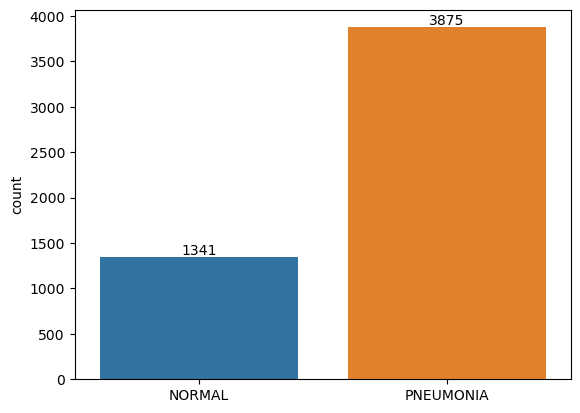

In [34]:
sx = sns.countplot(x=train_labels)
for container in sx.containers:
    sx.bar_label(container)
plt.show()

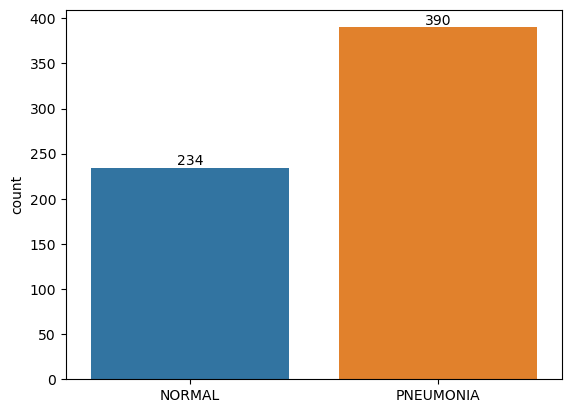

In [37]:
sx = sns.countplot(x=test_labels)
for container in sx.containers:
    sx.bar_label(container)
plt.show()

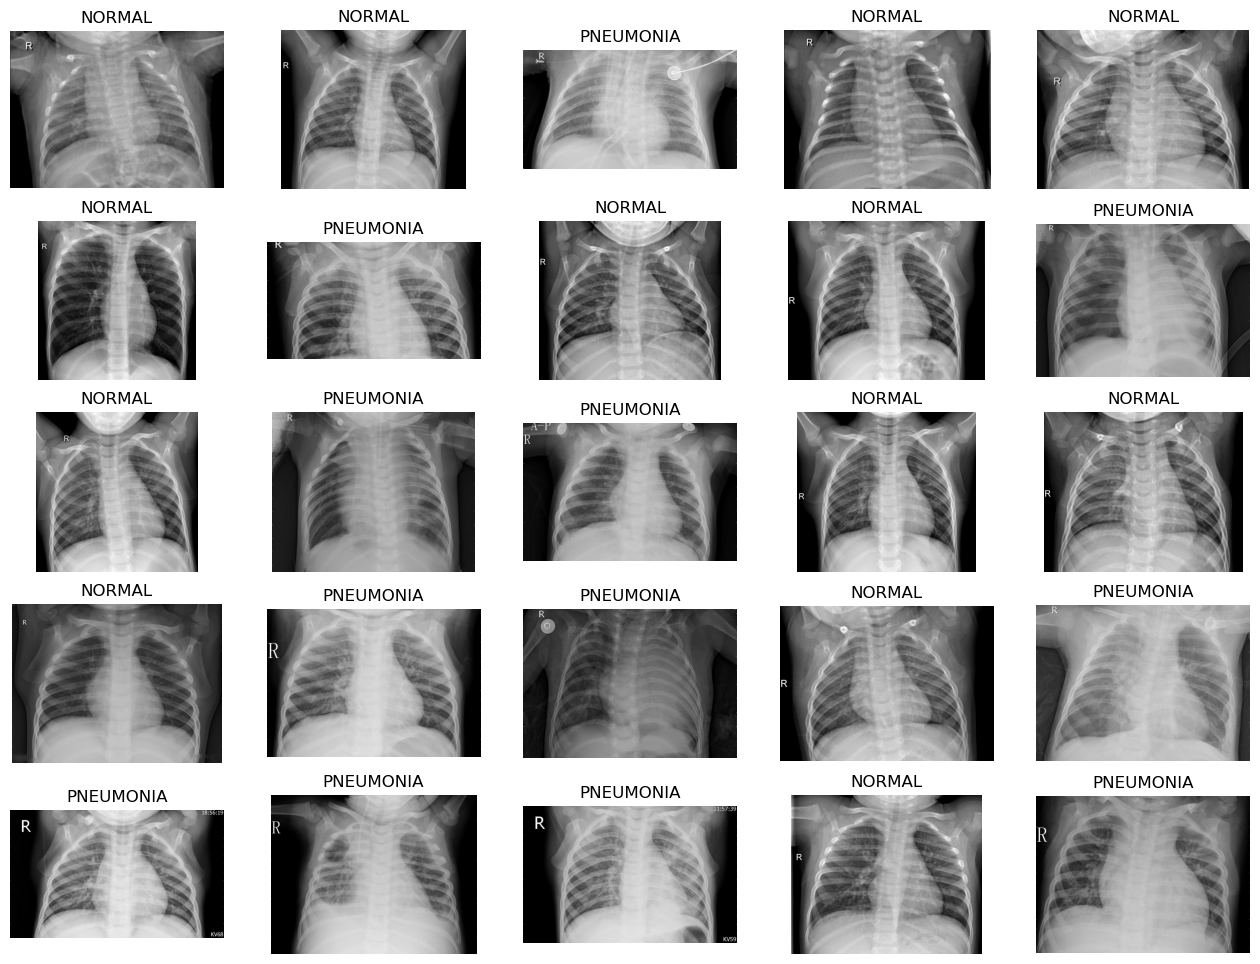

In [47]:
plt.figure(figsize=(16, 12))
for i in range(25):
    rand = random.randint(0, len(train_files))
    img = plt.imread(os.path.join(train_dir, train_labels[rand], train_files[rand]))
    plt.subplot(5, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(train_labels[rand])

In [5]:
transform = transforms.Compose([
    transforms.Resize([224, 224]),
    transforms.ToTensor()
])

In [6]:
training_data = datasets.ImageFolder(train_dir, transform=transform)
validation_data = datasets.ImageFolder(val_dir, transform=transform)
test_data = datasets.ImageFolder(test_dir, transform=transform)

In [7]:
training_data

Dataset ImageFolder
    Number of datapoints: 5216
    Root location: chest_xray/train
    StandardTransform
Transform: Compose(
               Resize(size=[224, 224], interpolation=bilinear)
               ToTensor()
           )

In [8]:
train_loader = dataloader.DataLoader(training_data, batch_size=8)
val_loader = dataloader.DataLoader(validation_data, batch_size=4)
test_loader = dataloader.DataLoader(test_data, batch_size=8)

In [9]:
len(train_loader), len(val_loader), len(test_loader)

(652, 4, 78)

In [10]:
model = torchvision.models.resnet101(pretrained=True)

In [61]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [12]:
model.fc = torch.nn.Linear(in_features = 2048, out_features = 2)
model.to(device)
loss_fn = torch.nn.CrossEntropyLoss()
loss_fn.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 3e-5)

In [13]:
def train(epochs=2):
    print("Start Training...")
    for i in range(epochs):
        print('='*20)
        print(f'training at epoch: {i}')
        
        train_loss = 0
        val_loss = 0
        
        model.train()
        for train_step, (images, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            if train_step % 20 == 0:
                print("Evaluation at ", train_step)
                
                val_accuracy = 0
                model.eval()
                for val_step, (val_images, val_labels) in enumerate(test_loader):
                    val_images, val_labels = val_images.to(device), val_labels.to(device)
                    val_outputs = model(val_images)
                    v_loss = loss_fn(val_outputs, val_labels)
                    val_loss += v_loss.item()
                    
                    _, val_preds = torch.max(val_outputs, 1)
                    val_accuracy += sum((val_preds == val_labels))
                    
                val_loss /= (val_step + 1)
                val_accuracy = val_accuracy/len(test_data)
                print(f"Validation loss: {val_loss:.4f} | Validation accuracy: {val_accuracy:.2f}")
                
                model.train()
             
            train_loss /= (train_step + 1)
            print(f"Traininig loss: {train_loss:.4f}")
    print("Trainig Complete")

In [15]:
train()

Start Training...
training at epoch: 0
Evaluation at  0
Validation loss: 0.6906 | Validation accuracy: 0.54
Traininig loss: 0.7021
Traininig loss: 0.6826
Traininig loss: 0.4348
Traininig loss: 0.2517
Traininig loss: 0.1578
Traininig loss: 0.1100
Traininig loss: 0.0814
Traininig loss: 0.0647
Traininig loss: 0.0515
Traininig loss: 0.0416
Traininig loss: 0.0345
Traininig loss: 0.0291
Traininig loss: 0.0250
Traininig loss: 0.0213
Traininig loss: 0.0178
Traininig loss: 0.0154
Traininig loss: 0.0132
Traininig loss: 0.0116
Traininig loss: 0.0104
Traininig loss: 0.0088
Evaluation at  20
Validation loss: 0.9553 | Validation accuracy: 0.38
Traininig loss: 0.0077
Traininig loss: 0.0068
Traininig loss: 0.0060
Traininig loss: 0.0052
Traininig loss: 0.0046
Traininig loss: 0.0042
Traininig loss: 0.0037
Traininig loss: 0.0033
Traininig loss: 0.0029
Traininig loss: 0.0026
Traininig loss: 0.0022
Traininig loss: 0.0021
Traininig loss: 0.0018
Traininig loss: 0.0017
Traininig loss: 0.0015
Traininig loss: 0

KeyboardInterrupt: 

In [16]:
next(iter(val_loader))

[tensor([[[[0.1843, 0.1647, 0.1137,  ..., 0.3098, 0.2824, 0.2549],
           [0.1176, 0.0706, 0.1216,  ..., 0.2980, 0.2784, 0.2431],
           [0.1569, 0.1725, 0.0745,  ..., 0.2902, 0.2667, 0.2392],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0392, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.1843, 0.1647, 0.1137,  ..., 0.3098, 0.2824, 0.2549],
           [0.1176, 0.0706, 0.1216,  ..., 0.2980, 0.2784, 0.2431],
           [0.1569, 0.1725, 0.0745,  ..., 0.2902, 0.2667, 0.2392],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0392, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.1843, 0.1647, 0.1137,  ..., 0.3098, 0.2824, 0.2549],
           [0.1176, 0.0706, 0.1216,  ..., 0.2980, 0.2784, 0.2431],
           [0.1569, 0.17

In [14]:
model(next(iter(val_loader))[0].to(device))

tensor([[0.2414, 0.2517],
        [0.2926, 0.2735],
        [0.2604, 0.3276],
        [0.2424, 0.2575]], device='cuda:0', grad_fn=<AddmmBackward>)

In [16]:
model(next(iter(val_loader))[0].to(device))

tensor([[ 3.1733, -2.6426],
        [ 2.9441, -2.5052],
        [ 3.1384, -2.5851],
        [ 3.0809, -2.3932]], device='cuda:0', grad_fn=<AddmmBackward>)